## Diabetes DATA

## Contexte
Ce jeu de données provient du National Institute of Diabetes and Digestive and Kidney Diseases des Etats Unis. L'objectif est de prédire, à partir de mesures diagnostiques, si un patient est diabétique.

## Contenu
Tous les patients ici sont des femmes âgées d'au moins 21 ans et d'origine indienne Pima.

## Description des variables
- Pregnancies : Nombre de grossesses
- Glucose : Concentration de glucose dans le plasma à 2 heures d'un test de tolérance au glucose oral.
- BloodPressure : Pression artérielle diastolique (mm Hg)
- SkinThickness : Épaisseur de la peau (mm)
- Insulin : Insuline sérique à 2 heures (mu U/ml)
- BMI : Indice de masse corporelle (poids en kg/(taille en m)^2)
- DiabetesPedigreeFunction : Fonction de pedigree de diabète
- Age : Age (années)
- Outcome (Résultat) : Variable de classe (0 ou 1)


In [20]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')


In [2]:
# Charger le corpus
diabetes_data = pd.read_csv('diab.csv')

# Montre les 5 premiers enregistrements.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
## Cette fonction donne des informations à propos des données, leurs types et colonnes et si ils ont des valeurs
## nulles etc
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
## Montre le compte des valeurs nulle pour chaque variable.
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### - To fill these Nan values the data distribution needs to be understood

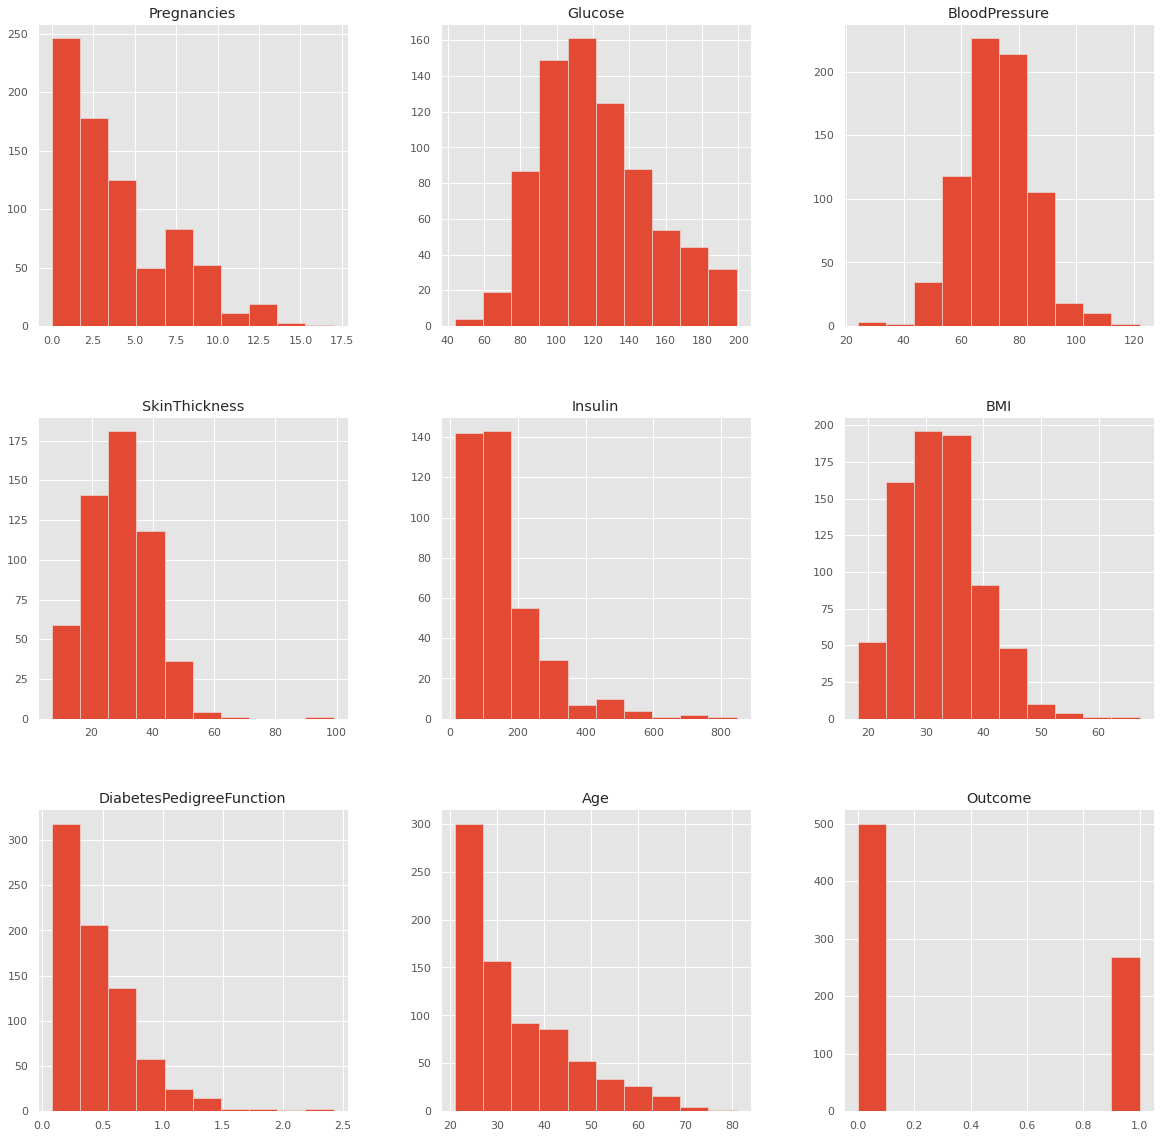

In [7]:
p = diabetes_data.hist(figsize = (20,20))

### Aiming to impute nan values for the columns in accordance with their distribution

In [8]:
#Si la variable est asymétrique, la moyenne est biaisée par les valeurs à l'extrémité de la distribution -> median
#Si elle est symétrique, on utilise donc la moyenne -> mean

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

### Plotting after Nan removal

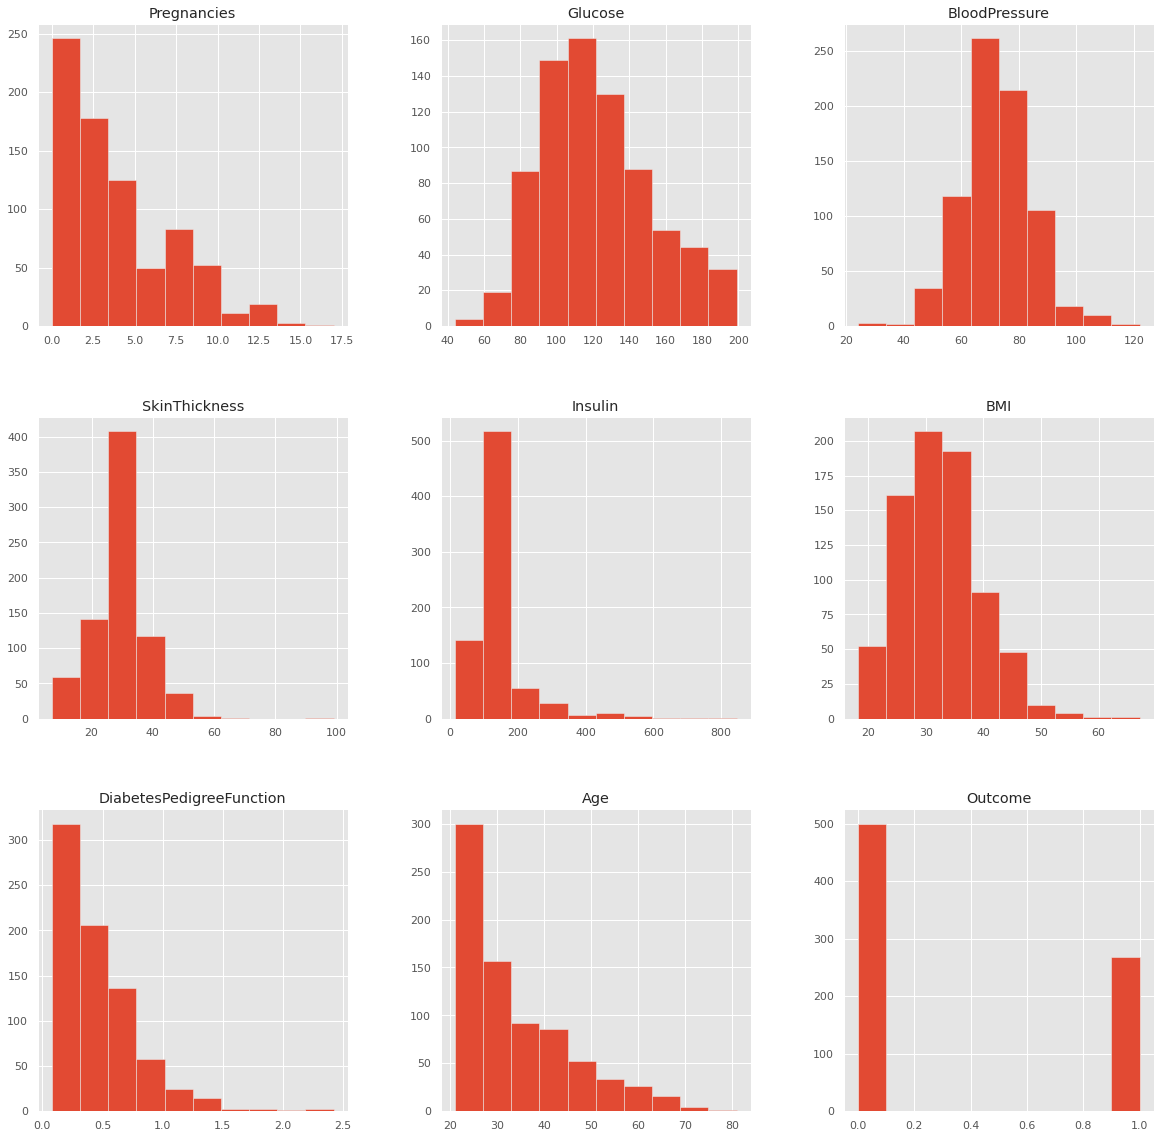

In [10]:
p = diabetes_data.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


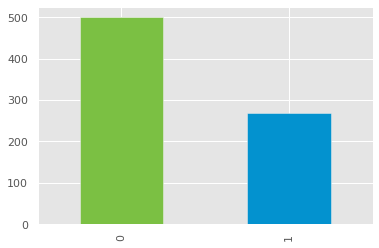

In [19]:
## vérifier l'équilibre des données en traçant le nombre de résultats en fonction de leur valeur.
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar", color=colors)

Coefficient de corrélation de Pearson : vous aide à trouver la relation entre deux quantités. Il vous donne la mesure de la force de l'association entre deux variables. La valeur du coefficient de corrélation de Pearson peut être comprise entre -1 et +1. 1 signifie qu'ils sont fortement corrélés et 0 signifie qu'il n'y a pas de corrélation.

Une heat map est une représentation bidimensionnelle d'informations à l'aide de couleurs. Les heat maps peuvent aider l'utilisateur à visualiser des informations simples ou complexes.

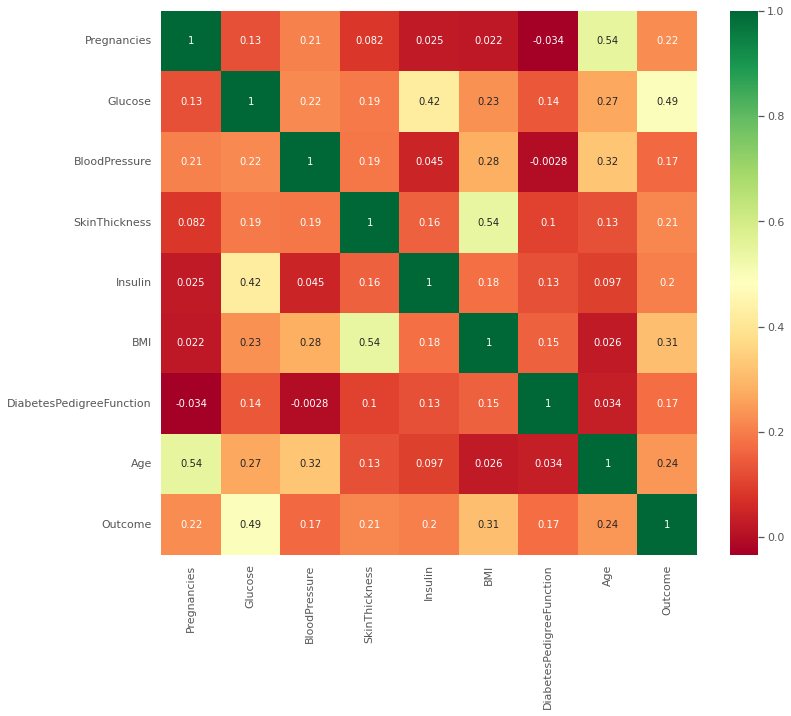

In [12]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')